## Imports

In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-08-28 15:04:16.708792: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Load data

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_files[0]

'/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc'

In [4]:
int(150*.8)

120

In [5]:
patch_files[149]

'/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20120614-0000_d01_model_patches.nc'

In [6]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [7]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [ ]:
### Pull selected variables from patch files and join into a single DataSet
num_files = 150
train_split = int(num_files*0.7)
val_split = int(num_files*0.8)
variables = ["REFL_COM_curr", "masks"]
data_list = []
for p, patch_file in enumerate(patch_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_train = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
train_masks = xr.concat(data_list, dim="p")["masks"]
data_list = []
for p, patch_file in enumerate(patch_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_val = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
val_masks = xr.concat(data_list, dim="p")["masks"]
data_list = []
for p, patch_file in enumerate(patch_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_test = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
test_masks = xr.concat(data_list, dim="p")["masks"]

In [9]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_train = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_val = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_test = xr.concat(csv_data_list, dim="p").to_array().transpose()

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTO

In [10]:
print(input_train.shape)
print(input_val.shape)
print(input_test.shape)
print(output_train.shape)
print(output_val.shape)
print(output_test.shape)

(34061, 144, 144, 1)
(4300, 144, 144, 1)
(12985, 144, 144, 1)
(34061, 2)
(4300, 2)
(12985, 2)


## Normalize data

In [11]:
# Normalize the input data
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [12]:
# Normalize the output data
output_scale_stats = pd.DataFrame(index=range(output_train.shape[-1]), columns=["mean", "sd"])
output_scale_stats.loc[:, "mean"] = output_train.mean(dim="p")
output_scale_stats.loc[:, "sd"] = output_train.std(dim="p")
output_train_norm = xr.DataArray(coords=output_train.coords, dims=output_train.dims)
output_val_norm = xr.DataArray(coords=output_val.coords, dims=output_val.dims)
output_test_norm = xr.DataArray(coords=output_test.coords, dims=output_test.dims)
for i in range(output_train.shape[-1]):
    output_train_norm[:, i] = (output_train[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_val_norm[:, i] = (output_val[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_test_norm[:, i] = (output_test[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]

## Augment data

In [13]:
def aug_da(da, concat_dim='p', rot=True):
    length = da[concat_dim].shape[0]
    aug_da = xr.concat([da]*4, dim=concat_dim)
    if rot:
        for k in range(4):
            aug_da.values[k*length:(k+1)*length] = np.rot90(aug_da.values[k*length:(k+1)*length], axes=(1, 2), k=k)
    aug_da[concat_dim] = np.arange(aug_da[concat_dim].shape[0])
    return aug_da

In [14]:
aug_input_train_norm = aug_da(input_train_norm)
aug_output_train_norm = aug_da(output_train_norm, rot=False)

## RICNN

In [15]:
ricnn_model = models.Sequential()
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
ricnn_model.add(GDL_layers.RotInvPool())
ricnn_model.add(layers.Flatten())
ricnn_model.add(layers.Dense(32, activation='relu'))
ricnn_model.add(layers.Dense(2))

2022-08-28 15:05:52.554453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-28 15:05:55.341035: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:1b:00.0, compute capability: 7.0


In [16]:
ricnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [17]:
ricnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [18]:
ricnn_history = ricnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10


2022-08-28 15:06:03.434670: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1065/1065 [==============================] - 86s 73ms/step - loss: 0.2599 - mse: 0.2599 - val_loss: 0.0817 - val_mse: 0.0817
Epoch 2/10
1065/1065 [==============================] - 77s 72ms/step - loss: 0.1034 - mse: 0.1034 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 3/10
1065/1065 [==============================] - 77s 72ms/step - loss: 0.0742 - mse: 0.0742 - val_loss: 0.0662 - val_mse: 0.0662
Epoch 4/10
1065/1065 [==============================] - 78s 73ms/step - loss: 0.0703 - mse: 0.0703 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 5/10
1065/1065 [==============================] - 77s 72ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 6/10
1065/1065 [==============================] - 77s 72ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.1077 - val_mse: 0.1077
Epoch 7/10
1065/1065 [==============================] - 77s 72ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 8/10
1065/1065 [==============================] - 77s

## CNN

In [19]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(2))

In [20]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [21]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [22]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1065/1065 [==============================] - 20s 18ms/step - loss: 0.3345 - mse: 0.3345 - val_loss: 0.1400 - val_mse: 0.1400
Epoch 2/10
1065/1065 [==============================] - 19s 17ms/step - loss: 0.1804 - mse: 0.1804 - val_loss: 0.0969 - val_mse: 0.0969
Epoch 3/10
1065/1065 [==============================] - 19s 18ms/step - loss: 0.1308 - mse: 0.1308 - val_loss: 0.0766 - val_mse: 0.0766
Epoch 4/10
1065/1065 [==============================] - 19s 17ms/step - loss: 0.1030 - mse: 0.1030 - val_loss: 0.1454 - val_mse: 0.1454
Epoch 5/10
1065/1065 [==============================] - 19s 17ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.0759 - val_mse: 0.0759
Epoch 6/10
1065/1065 [==============================] - 19s 18ms/step - loss: 0.0649 - mse: 0.0649 - val_loss: 0.1102 - val_mse: 0.1102
Epoch 7/10
1065/1065 [==============================] - 19s 18ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 8/10
1065/1065 [==========================

## Augmented CNN

In [23]:
aug_cnn_model = models.Sequential()
aug_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
aug_cnn_model.add(layers.Flatten())
aug_cnn_model.add(layers.Dense(32, activation='relu'))
aug_cnn_model.add(layers.Dense(2))

In [24]:
aug_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [25]:
aug_cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [26]:
aug_cnn_history = aug_cnn_model.fit(x=aug_input_train_norm, y=aug_output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
4258/4258 [==============================] - 73s 17ms/step - loss: 0.1915 - mse: 0.1915 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 2/10
4258/4258 [==============================] - 71s 17ms/step - loss: 0.0881 - mse: 0.0881 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 3/10
4258/4258 [==============================] - 71s 17ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 4/10
4258/4258 [==============================] - 71s 17ms/step - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0412 - val_mse: 0.0412
Epoch 5/10
4258/4258 [==============================] - 71s 17ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 6/10
4258/4258 [==============================] - 71s 17ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 7/10
4258/4258 [==============================] - 72s 17ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 8/10
4258/4258 [==========================

## History Plots

(0.0, 0.3499607638455927)

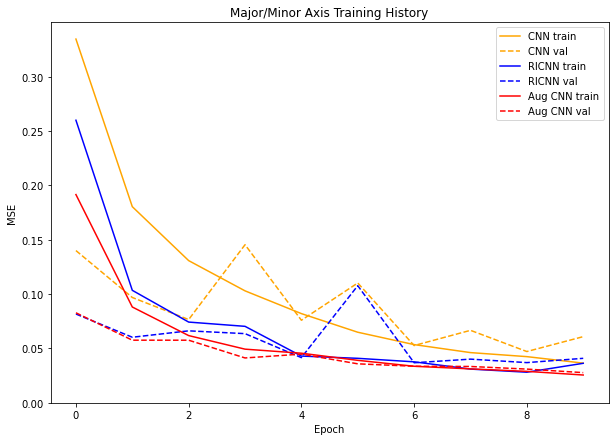

In [27]:
F, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = plt.gca()
a = ax.plot(cnn_history.history['mse'], label='CNN train', color='orange')
b = ax.plot(cnn_history.history['val_mse'], label='CNN val', color='orange', linestyle='dashed')
c = ax.plot(ricnn_history.history['mse'], label='RICNN train', color='blue')
d = ax.plot(ricnn_history.history['val_mse'], label='RICNN val', color='blue', linestyle='dashed')
e = ax.plot(aug_cnn_history.history['mse'], label='Aug CNN train', color='red')
f = ax.plot(aug_cnn_history.history['val_mse'], label='Aug CNN val', color='red', linestyle='dashed')
ax.legend()
ax.set_title("Major/Minor Axis Training History")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")
ax.set_ylim(bottom=0)

## Save and load models

In [28]:
ricnn_model.save("saved_models/aug_ricnn/ricnn_model")
cnn_model.save("saved_models/aug_ricnn/cnn_model")
aug_cnn_model.save("saved_models/aug_ricnn/aug_cnn_model")

INFO:tensorflow:Assets written to: saved_models/aug_ricnn/ricnn_model/assets


INFO:tensorflow:Assets written to: saved_models/aug_ricnn/cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/aug_ricnn/cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/aug_ricnn/aug_cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/aug_ricnn/aug_cnn_model/assets


In [29]:
ricnn_model = tf.keras.models.load_model("saved_models/aug_ricnn/ricnn_model")
cnn_model = tf.keras.models.load_model("saved_models/aug_ricnn/cnn_model")
aug_cnn_model = tf.keras.models.load_model("saved_models/aug_ricnn/aug_cnn_model")

## Evaluate models

In [30]:
ricnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 11s 27ms/step - loss: 0.0483 - mse: 0.0483


[0.04834102839231491, 0.04834102839231491]

In [31]:
cnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 4s 11ms/step - loss: 0.0705 - mse: 0.0705


[0.07047997415065765, 0.07047997415065765]

In [32]:
aug_cnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 4s 11ms/step - loss: 0.0364 - mse: 0.0364


[0.036350179463624954, 0.036350179463624954]